# Locomotion

## Differential drive

$ (x, y, \theta) $ - the pose of the robot  
$ v_l $, $ v_r $ - the speed of the left and right wheel  
$ t $ - the driving time  
$ l $ - the distance between the wheels  

Radius:

$$ R = \frac{l}{2} \frac{v_r + v_l}{v_r - v_l} $$

ICC - Instantaneous center of curvature:

$$ ICC = [ x - R \sin{\theta} , y + R \cos{\theta} ] $$

Angular speed:

$$ \omega = \frac{v_r - v_l}{l} $$

### Forward kinematics

\begin{equation}
    \begin{pmatrix}
    x' \\
    y' \\
    \theta'
    \end{pmatrix} = 
    \begin{pmatrix}
    \cos{\omega t} & -\sin{\omega t} & 0\\
    \sin{\omega t} & \cos{\omega t}  & 0\\
    0 & 0 & 1
    \end{pmatrix} \cdot
    \begin{pmatrix}
    x - ICC_{x} \\
    y - ICC{y} \\
    \theta
    \end{pmatrix} +
    \begin{pmatrix}
    ICC_{x} \\
    ICC{y} \\
    \omega t
    \end{pmatrix}
\end{equation}


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def diffdrive(x, y, theta, v_l, v_r, t, l):
    '''
    x - starting x coordinate
    y - starting y coordinate
    theta - starting orientation
    v_l - velocity of the left wheel
    v_r - velocity of the right wheel
    t - driving time
    l - distance between the wheels
    '''

    # v_l = v_r -> robot goes straight (v_r - v_l == 0 means the radius is infinite)
    if v_l == v_r:
        v = (v_l + v_r) / 2
        s = v * t
        x_n = x + s * np.cos(theta)
        y_n = y + s * np.sin(theta)
        theta_n = theta

    # v_l != v_r -> robot circles
    else:
        R = (l / 2) * ((v_r + v_l) / (v_r - v_l))
        x_ICC = x - R * np.sin(theta)
        y_ICC = y + R * np.cos(theta)
        omega = (v_r - v_l) / l
        dtheta = omega * t
        theta_n = theta + dtheta
        dx = x - x_ICC
        dy = y - y_ICC
        x_n = x_ICC + dx * np.cos(dtheta) - dy * np.sin(dtheta)
        y_n = y_ICC + dx * np.sin(dtheta) + dy * np.cos(dtheta)

    return x_n, y_n, theta_n

### Example

The distance $ l $ between the wheels of the robot is $ 0.5 m $.  
After reaching position $ x = 1.5 m, y = 2.0 m, \theta = \frac{\pi}{2}$, the robot executes the following sequence of steering commands:
$$ c_1 = (v_l = 0.3 m/s, v_r = 0.3 m/s, t = 3 s) $$
$$ c_2 = (v_l = 0.1 m/s, v_r = -0.1 m/s, t = 1 s) $$
$$ c_3 = (v_l = 0.2 m/s, v_r = 0 m/s, t = 2 s) $$
The position of the robot after the execution of each command in the sequence is:

Executing c1...
p1 = (1.500000, 2.900000, 1.570796)
Executing c2...
p2 = (1.500000, 2.900000, 1.170796)
Executing c3...
p3 = (1.639676, 3.035655, 0.370796)


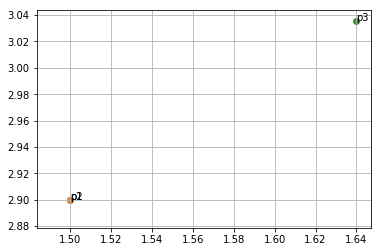

In [40]:
l = 0.5

x, y, theta = 1.5, 2, np.pi / 2

commands = [
    (0.3, 0.3, 3),  # c1
    (0.1, -0.1, 1), # c2
    (0.2, 0, 2)     # c3
]

for i, (v_l, v_r, t) in enumerate(commands):
    print("Executing c{}...".format(i + 1))
    x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)    
    print("p{} = ({:2f}, {:2f}, {:2f})".format(i + 1, x, y, theta))
    plt.scatter([x], [y])
    plt.text(x, y, "p{}".format(i + 1))

plt.grid()